In [1]:
import sympy
from sympy import symbols, diff
import numpy as np
import pandas as pd
from scipy.linalg import solve
from sympy.solvers.solveset import linsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy.linalg as ln
import scipy as sp
import scipy.optimize
from math import *
from sympy import *
from copy import deepcopy
from scipy.optimize import brentq

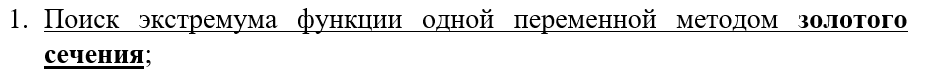

In [2]:
func = input('Введите функцию f(x)=: ')
limit = input('Границы области оптимизации: ').split()
par = int(input('Указать необязательные параметры? 1-да/0-нет: '))
if par:
    accuracy = float(input('Точность оптимизации по аргументу: '))
    iteration = int(input('Максимальное число итераций: '))
    inter_res = int(input('Вывод промежуточных результатов? 1-да/0-нет: '))
    wr_inter_res = int(input('Запись промежуточных результатов? 1-да/0-нет: '))


if not par:
    accuracy = 0.00001
    iteration = 500
    inter_res = 0
    wr_inter_res = 0

Введите функцию f(x)=: x**2 - 40*x + 5000
Границы области оптимизации: 0 30
Указать необязательные параметры? 1-да/0-нет: 1
Точность оптимизации по аргументу: 0.00001
Максимальное число итераций: 500
Вывод промежуточных результатов? 1-да/0-нет: 0
Запись промежуточных результатов? 1-да/0-нет: 1


In [3]:
x = symbols('x')
func = sympy.sympify(func)

Xl = float(limit[0]); Xu = float(limit[1])

df = pd.DataFrame()
m_xopt = []
m_yopt = []

ea = 100
i = 1
it = 0
R = (5 ** 0.5 - 1) / 2
D = R * (Xu - Xl)
x1 = Xl + D
x2 = Xu - D
f1 = func.subs(x, x1)
f2 = func.subs(x, x2)
if inter_res:
    print (' x       ea         xopt       yopt')

#Golden-Section Search Method
while ea >= accuracy and it < iteration:
    if f1 < f2:
        Xl = x2
        x2 = x1
        f2 = f1
        x1 = Xl + R*(Xu - Xl)
        f1 = func.subs(x, x1)
    else:
        Xu = x1
        x1 = x2
        f1 = f2
        x2 = Xu - R*(Xu - Xl)
        f2 = func.subs(x, x2)

    if f1 < f2:
        xopt = x1
        yopt = func.subs(x, xopt)
    else:
        xopt = x2
        yopt = func.subs(x, xopt)


    ea = (1 - R) * abs((Xu - Xl) / xopt) * 100
    m_xopt.append(xopt)
    m_yopt.append(yopt)
    if inter_res:
        print (f"{i:>2}   {ea:>8.5f}   {xopt:>10.7f}   {yopt:>10.7f}")
    i += 1
    it += 1

df['xopt'] = m_xopt
df['yopt'] = m_yopt


print(f'Координата точки экстремума: {xopt}')
print(f'Значение функции в точке экстремума: {yopt}')
if ea == accuracy:
    print(f'Найдено значение с указанной точностью: {accuracy}')
if it == iteration:
    print('Достигнуто максимальное кол-во итераций')
if wr_inter_res:
    rrr = int(input('Вывести запись промежуточных итераций? 1-да/0-нет '))
    if rrr:
        print(df)

Координата точки экстремума: 19.99999970046681
Значение функции в точке экстремума: 4600.00000000000
Вывести запись промежуточных итераций? 1-да/0-нет 1
         xopt              yopt
0   18.541020  4602.12862362522
1   18.541020  4602.12862362522
2   20.212862  4600.04531038538
3   20.212862  4600.04531038538
4   20.212862  4600.04531038538
5   20.212862  4600.04531038538
6   19.968944  4600.00096448757
7   19.968944  4600.00096448757
8   19.968944  4600.00096448757
9   19.968944  4600.00096448757
10  20.004531  4600.00002053031
11  20.004531  4600.00002053031
12  20.004531  4600.00002053031
13  20.004531  4600.00002053031
14  19.999339  4600.00000043701
15  19.999339  4600.00000043701
16  19.999339  4600.00000043701
17  19.999339  4600.00000043701
18  20.000096  4600.00000000930
19  20.000096  4600.00000000930
20  20.000096  4600.00000000930
21  20.000096  4600.00000000930
22  19.999986  4600.00000000020
23  19.999986  4600.00000000020
24  19.999986  4600.00000000020
25  19.999986  

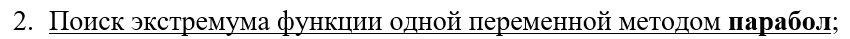

In [4]:
func = input('Введите функцию f(x)=: ')
limit = input('Границы области оптимизации: ').split()
par = int(input('Указать необязательные параметры? 1-да/0-нет: '))
if par:
    accuracy = float(input('Точность оптимизации по аргументу: '))
    iteration = int(input('Максимальное число итераций: '))
    inter_res = int(input('Вывод промежуточных результатов? 1-да/0-нет: '))
    wr_inter_res = int(input('Запись промежуточных результатов? 1-да/0-нет: '))


if not par:
    accuracy = 0.00001
    iteration = 500
    inter_res = 0
    wr_inter_res = 0

Введите функцию f(x)=: x**2 - 40*x + 5000
Границы области оптимизации: 0 30
Указать необязательные параметры? 1-да/0-нет: 1
Точность оптимизации по аргументу: 0.00001
Максимальное число итераций: 500
Вывод промежуточных результатов? 1-да/0-нет: 0
Запись промежуточных результатов? 1-да/0-нет: 0


In [5]:
def parabola():
    x = symbols('x')
    F = eval(func)
    
    a = float(limit[0])
    b = float(limit[1])
        
    it = 0
    ea = 100
    while (ea > accuracy) or (it < iteration):
        if it == 0:
            x1 = a
            x3 = b
            x2 = (x1+x3)/2

        f1 = F.subs(x, x1)
        f2 = F.subs(x, x2)
        f3 = F.subs(x, x3)
        
        a0 = float(deepcopy(f1))
        a1 = float((f2-f1)/(x2-x1))
        a2 = float(1/(x3-x2) * ((f3-f1)/(x3-x1) - (f2-f1)/(x2-x1)))
        
        if it > 0:
            x_old = deepcopy(x_)
            
        x_ = 1/2*(x1+ x2 - a1/a2)
        
        if it > 0:
            ea = abs(x_old - x_)
        
            if ea <= accuracy:
                x_res = deepcopy(x_)

        f_x_ = F.subs(x, x_)

        if x1 < x_ < x2 < x3 and f_x_ >= f2:
            x1 = deepcopy(x_)
            f1 = deepcopy(f_x_)
        elif x1 < x2 < x_ < x3 and f2 >= f_x_:
            x1 = deepcopy(x2)
            f1 = deepcopy(f2)
            x2 = deepcopy(x_)
            f2 = deepcopy(f_x_)

        it += 1

    f_res = F.subs(x, x_res)

    return x_res


In [6]:
print(parabola(),eval(func).subs(x, parabola()))

20.0 4600.00000000000


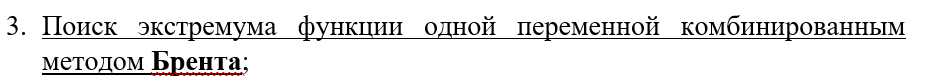

In [10]:
func = input('Введите функцию f(x)=: ')
limit = input('Границы области оптимизации: ').split()
par = int(input('Указать необязательные параметры? 1-да/0-нет: '))
if par:
    accuracy = float(input('Точность оптимизации по аргументу: '))
    iteration = int(input('Максимальное число итераций: '))
    inter_res = int(input('Вывод промежуточных результатов? 1-да/0-нет: '))
    wr_inter_res = int(input('Запись промежуточных результатов? 1-да/0-нет: '))


if not par:
    accuracy = 0.00001
    iteration = 500
    inter_res = 0
    wr_inter_res = 0

Введите функцию f(x)=: x**2 - 40*x + 5000
Границы области оптимизации: 0 30
Указать необязательные параметры? 1-да/0-нет: 0


In [11]:
def BrantMethod():
    
    x = symbols('x')
    F = eval(func)
    
    aa = float(limit[0])
    bb = float(limit[1])
    
    r = (3-5**(1/2))/2
    
    x1 = aa + r*(bb - aa)
    w = aa + r*(bb - aa)
    v = aa + r*(bb - aa)
 
    f_x = F.subs(x, x1)
    f_w = F.subs(x, w)
    f_v = F.subs(x, v)
    
    d_cur = bb - aa
    d_prv = bb - aa
    
    step = 0
    while step <= iteration:
        if max(abs(x1 - aa), abs(bb -x1)) < accuracy:
            return x, F.subs(x, x1)
        g = d_prv /2
        d_prv = deepcopy(d_cur)

        u = parabola()
        if u is None or not(aa <= u <= bb) or abs(u-x1) > g:
            if x1 < (aa+bb)/2:
                u = x1 + r*(bb-x1)
                d_prv = bb - x1
            else:
                u = x1 - r*(x1 - aa)
                d_prv = x1 - aa
        d_cur = abs(u - x1)
        if F.subs(x, u) > f_x:
            if u < x1:
                aa = deepcopy(u)
            else:
                bb = deepcopy(u)
            if F.subs(x, u) <= f_w or w == x1:
                v = deepcopy(w)
                w = deepcopy(u)
            else:
                if F.subs(x, u) <= f_v or v == x1 or v == w:
                    v = deepcopy(u)
        else:
            if u < x1:
                bb = deepcopy(x1)
            else:
                aa = deepcopy(x1)
            v = deepcopy(w)
            w = deepcopy(x1)
            x1 = deepcopy(u)
    
    return x1

In [ ]:
BrantMethod()

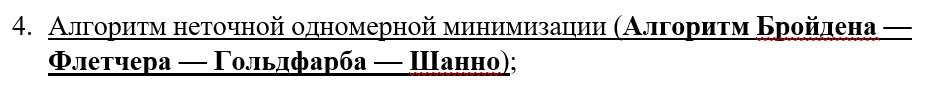

In [ ]:
### Незаконченный алгоритм, который работатет только при обозначении функции в коде

In [49]:
func = input('Введите функцию f(x, y)=: ')
limit = input('Начальная точка: ').split()
par = int(input('Указать необязательные параметры? 1-да/0-нет: '))
if par:
    v1 = float(input('Параметр для первого условия Вольфе: '))
    v2 = float(input('Параметр для второго условия Вольфе: '))
    max_x = float(input('Максимально возможное значение аргумента функции: '))
    exit = float(input('Порог выхода по длине интервала поиска: '))
    iteration = int(input('Максимальное число итераций: '))
    inter_res = int(input('Вывод промежуточных результатов? 1-да/0-нет: '))
    wr_inter_res = int(input('Запись промежуточных результатов? 1-да/0-нет: '))


if not par:
    v1 = 0.0001
    v2 = 0.1
    max_x = 100
    exit = 0.00000001
    iteration = 500
    inter_res = 0
    wr_inter_res = 0

Введите функцию f(x, y)=: x**2 - x*y + y**2 + 9*x -6*y + 20
Начальная точка: 0 0
Указать необязательные параметры? 1-да/0-нет: 0


In [329]:
import numpy as np
import numpy.linalg as ln
import scipy as sp
import scipy.optimize


# Objective function
def f(x):
    return x[0]**2 - x[0]*x[1] + x[1]**2 + 9*x[0] - 6*x[1] + 20


# Derivative
def f1(x):
    return np.array([2 * x[0] - x[1] + 9, -x[0] + 2*x[1] - 6])


def bfgs_method(f, fprime, x0, maxiter=None, epsi=10e-3):
    
    if maxiter is None:
        maxiter = len(x0) * 200

    k = 0
    gfk = fprime(x0)
    N = len(x0)
    # Set the Identity matrix I.
    I = np.eye(N, dtype=int)
    Hk = I
    xk = x0
   
    while ln.norm(gfk) > epsi and k < maxiter: 
        
        pk = -np.dot(Hk, gfk)

        line_search = sp.optimize.line_search(f, f1, xk, pk)
        alpha_k = line_search[0]
        
        xkp1 = xk + alpha_k * pk
        sk = xkp1 - xk
        xk = xkp1
        
        gfkp1 = fprime(xkp1)
        yk = gfkp1 - gfk
        gfk = gfkp1
        
        k += 1
        
        ro = 1.0 / (np.dot(yk, sk))
        A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
        A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]
        Hk = np.dot(A1, np.dot(Hk, A2)) + (ro * sk[:, np.newaxis] *
                                                 sk[np.newaxis, :])
        
    return (xk, k)


result, k = bfgs_method(f, f1, np.array([1, 1]))

print('Final Result: %s' % (result))
print('Iteration Count: %s' % (k))

Final Result: [-4.  1.]
Iteration Count: 3
